In [2]:
# Loading all the necessary python libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

import pickle
from sklearn.externals import joblib
import requests, json




C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
# Reading the csv file
dfRaw = pd.read_csv("datasets/restaurantSalesData_v1.csv")

# Creating a copy for use
dfUse = dfRaw[:-21]

# dropping the Nan values
dfUse = dfUse.dropna()



In [4]:
# Handling Ouliers by removing them with IQR value.
Q1 = dfUse['totalSales'].quantile(0.25)
Q3 = dfUse['totalSales'].quantile(0.75)
IQR = Q3 - Q1
# the outlier removed dataframe is stored within a different variable.
dfTotalSales = dfUse.copy()
dfNoOutlierSales = dfTotalSales[~((dfTotalSales['totalSales'] < (Q1 - 1.5 * IQR)) |(dfTotalSales['totalSales'] > (Q3 + 1.5 * IQR)))]



In [5]:
# REMOVING - corelated and insignificant values

dfUse = dfUse.drop(['tempMin', 'feelsLikeMax','feelsLikeMin', 'googleTrends', 
                    'gtNew', '3_Month Avg','weatherScore__2'], axis=1)
#print(len(dfUse.columns))


In [14]:
# dividing data to features and lables
dfFeatures = dfUse.iloc[:, 1:-1]
dfLables = dfUse.iloc[:, -1:]



In [26]:
# Normalisation the original dataframe
# Get column names first
names = dfFeatures.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
normalizedX = scaler.fit_transform(dfFeatures)
normalizedX = pd.DataFrame(normalizedX, columns=names)

# Cross-Checking the normalised values.
#normalizedX.describe()

# Removing Corelation
#normalizedX = normalizedX.drop(['feelsLikeMin', 'tempMin', 'tempMax', 'weatherScore__2'], axis=1)



In [53]:
# Manually Splitting Train - Test Data

X_train = dfFeatures.iloc[:-30, 1:]
X_test = dfFeatures.iloc[-30:, 1:]

y_train = dfLables.iloc[:-30]
y_test = dfLables.iloc[-30:]

In [54]:
X_test

,dayOfMonth__0,dayOfMonth__1,dayOfMonth__2,dayOfMonth__3,dayOfMonth__4,dayOfMonth__5,dayOfMonth__6,dayOfMonth__7,dayOfMonth__8,dayOfMonth__9,...,weatherScore__11,weatherScore__12,weatherScore__13,weatherScore__14,weatherScore__15,weatherScore__16,weatherScore__17,weatherScore__18,weatherScore__19,currentHoliday
891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,2,0,0,0,0,0
892,1,0,0,0,0,0,0,0,0,0,...,0,0,0,4,3,0,0,0,0,0
893,0,1,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
894,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
895,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,0,0,0,0,1,0,0,0,0,0,...,0,0,0,8,2,0,0,0,0,0
897,0,0,0,0,0,1,0,0,0,0,...,0,0,0,10,0,0,0,0,0,0
898,0,0,0,0,0,0,1,0,0,0,...,0,0,0,12,0,0,0,0,0,0
899,0,0,0,0,0,0,0,1,0,0,...,0,0,0,8,0,0,0,0,0,0
900,0,0,0,0,0,0,0,0,1,0,...,0,0,0,12,0,0,0,0,0,0


In [55]:
## Modelling

# splitting the values to train and test with the inbuilt function
#X_train, X_test, y_train, y_test = train_test_split(normalizedX, dfLables, 
 #                                                   test_size=0.05, random_state=10)

# Creating a object for the model
regressor = LinearRegression()  

# Training the model with the feature and labels 
regressor.fit(X_train, y_train)

# predictin the values
y_pred = regressor.predict(X_test)

# Displaying the errors.
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



In [56]:
# Evaluating
from sklearn.metrics import mean_squared_error
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
# Checking for r2 score and rmse values

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

print("test_set_rmse: ", test_set_rmse)
print("test_set_r2: ", test_set_r2)



Mean Absolute Error: 13057.566666666668
Mean Squared Error: 271244439.71666664
test_set_rmse:  16469.500287399936
test_set_r2:  0.8837358021723741


In [43]:
print(len(X_test.columns))
X_test.columns

71


Index(['dayOfMonth__0', 'dayOfMonth__1', 'dayOfMonth__2', 'dayOfMonth__3',
       'dayOfMonth__4', 'dayOfMonth__5', 'dayOfMonth__6', 'dayOfMonth__7',
       'dayOfMonth__8', 'dayOfMonth__9', 'dayOfMonth__10', 'dayOfMonth__11',
       'dayOfMonth__12', 'dayOfMonth__13', 'dayOfMonth__14', 'dayOfMonth__15',
       'dayOfMonth__16', 'dayOfMonth__17', 'dayOfMonth__18', 'dayOfMonth__19',
       'dayOfMonth__20', 'dayOfMonth__21', 'dayOfMonth__22', 'dayOfMonth__23',
       'dayOfMonth__24', 'dayOfMonth__25', 'dayOfMonth__26', 'dayOfMonth__27',
       'dayOfMonth__28', 'dayOfMonth__29', 'dayOfMonth__30', 'dayOfWeek__0',
       'dayOfWeek__1', 'dayOfWeek__2', 'dayOfWeek__3', 'dayOfWeek__4',
       'dayOfWeek__5', 'dayOfWeek__6', 'monthOfYear__0', 'monthOfYear__1',
       'monthOfYear__2', 'monthOfYear__3', 'monthOfYear__4', 'monthOfYear__5',
       'monthOfYear__6', 'monthOfYear__7', 'monthOfYear__8', 'monthOfYear__9',
       'monthOfYear__10', 'monthOfYear__11', 'tempMax', 'weatherScore__0',
 

In [57]:
# creating a dataframe for actual and predicted values
testDate = dfUse['Date'].values[-30:]
y_testList = list()
y_PredList = list()
for i in range(len(y_test)):
    y_testList.append(y_test.values[i][0])
    y_PredList.append(y_pred[i][0])
    
comparisionDF_5 = pd.DataFrame({'Date': testDate, 'Actual':y_testList, 'Predicted':y_PredList})



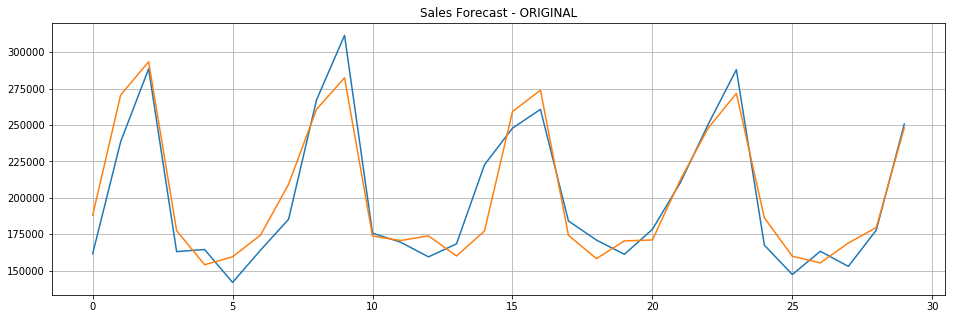

In [58]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Sales Forecast - ORIGINAL')
plt.plot(comparisionDF_5[['Actual', 'Predicted']])


In [59]:
# import joblib
from joblib import dump

# Dumping the model for future use
dump(regressor, filename="salesForecast_v2.joblib")

# Dumping the Actual vs Predicted model results
dump(comparisionDF_5, filename='comparisionDF_v2.joblib')

['comparisionDF_v2.joblib']

In [44]:
# dumping the test data
dump(y_test, filename='yTest.joblib')
dump(X_test, filename='xTest.joblib')

['xTest.joblib']

In [63]:
from joblib import load